In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from urllib.request import urlopen
from concurrent.futures import ProcessPoolExecutor , ThreadPoolExecutor

1 Thread.jpg


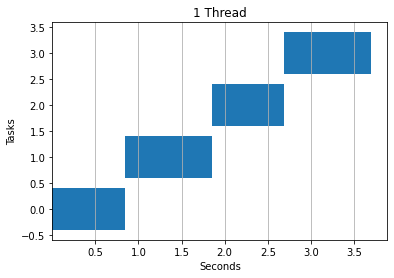

2 Thread.jpg


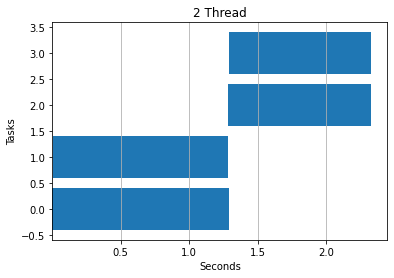

2.3222815990448

In [5]:
def download(url , base):
    start = time.time() - base
    try:
        resp = urlopen(url)
    except Exception as e :
        print('ERROR : %s' % e)
    stop = time.time() - base
    return start , stop

def multithreading(func , args , workers):
    begin_time = time.time()
    with ThreadPoolExecutor(max_workers = workers) as executor:
        res = executor.map(func , args , [begin_time for i in range(len(args))])
    return list(res)

def multiprocessing(func , args , workers):
    begin_time = time.time()
    with ProcessPoolExecutor(max_workers = workers) as executor:
        res = executor.map(func , args , [begin_time for i in range(len(args))])
    return list(res)

def visualize_runtimes(results , title):
    start , stop = np.array(results).T
    plt.barh(range(len(start)) , stop - start , left = start)
    plt.grid(axis = 'x')
    plt.ylabel('Tasks')
    plt.xlabel('Seconds')
    plt.title(title)
    name = title + ".jpg"
    plt.savefig(name , dpi = 300)
    print(name)
    plt.show()
    return stop[-1] - start[0]

N = 4
URL = 'http://www.pdf995.com/samples/pdf.pdf'
urls = [URL for i in range (N)]

#if __name__ == '__main__':
visualize_runtimes(multithreading(download , urls , 1) , "1 Thread")
visualize_runtimes(multithreading(download , urls , 2) , "2 Thread")

In [ ]:
visualize_runtimes(multiprocessing(download , urls , 1) , "1 Process")
visualize_runtimes(multiprocessing(download , urls , 2) , "2 Process")